In [13]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [14]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vx=1, xp=xp
    ),
    nx=N,
    p=p,
    MOOD=True,
    # NAD=True,
    # NAD_rtol=1.0,
    # NAD_atol=1e-5,
    max_MOOD_iters=2,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=0.0,
)
sim.run(1.0)

100%|██████████| 1.0/1.0 [00:00]                 


In [15]:
sim.MOOD_config

MOODConfig(max_iters=2, cascade=['fv3', 'fv0'], cascade_status=[False, False], NAD=False, NAD_rtol=1.0, NAD_atol=0.0, global_dmp=False, include_corners=False, PAD=True, PAD_bounds=array([[[[[  0.,   1.]]]],



       [[[[-inf,  inf]]]],



       [[[[-inf,  inf]]]],



       [[[[-inf,  inf]]]]]), PAD_atol=0.0, SED=False)

In [16]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0000000000000002))

Text(0, 0.5, 'MOOD iterations/step')

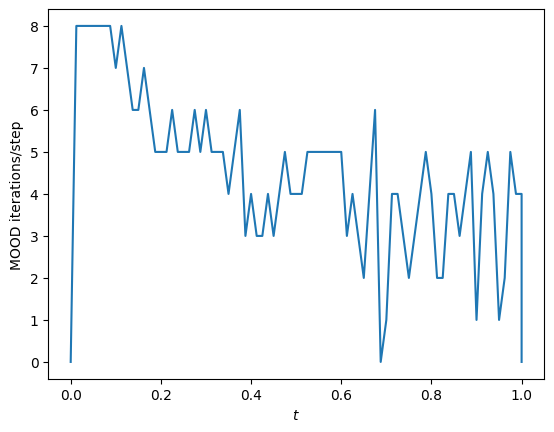

In [17]:
plt.plot(sim.minisnapshots["t"], sim.minisnapshots["MOOD_iters"])
plt.xlabel(r"$t$")
plt.ylabel(r"MOOD iterations/step")

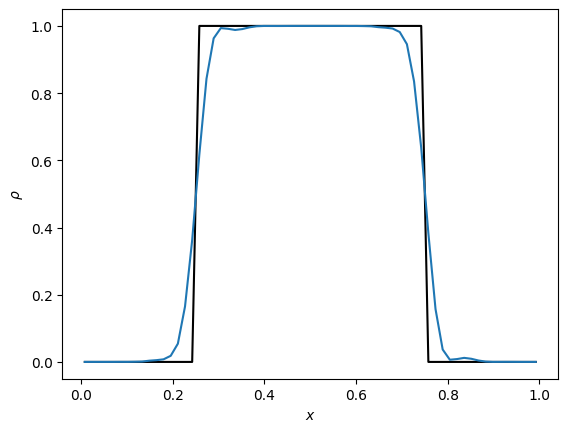

In [18]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, xlabel=True)